### Problem Statement

*Predicting housing prices is of interest to potential buyers, sellers, and organizations alike. Multiple online platforms offer, for example, a free “price estimate” based on underlying machine learning models. For this assignment, we are going to build the best machine learning model we can for Ames, Iowa. The data set consists of 79 features that describe the quality and quantity of the properties to base our predictions on.*

# Task 0: Data Preperation

*Note: No code has to be written for the 5 cells below - you may just execute them sequentially. After this, you may move on to **Task 1** on understanding the data.*

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from math import sqrt
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")

In [2]:
# All missing data removed/cleaned
housing_df = pd.read_csv(r"C:\Users\adity\Downloads\Ames+Dataset\Ames Dataset\ames_data_no_missing.csv", index_col=0)
housing_df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.000000,31770,Pave,NaN,IR1,Lvl,Corner,Gtl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
526350040,20,RH,80.000000,11622,Pave,NaN,Reg,Lvl,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
526351010,20,RL,81.000000,14267,Pave,NaN,IR1,Lvl,Corner,Gtl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
526353030,20,RL,93.000000,11160,Pave,NaN,Reg,Lvl,Corner,Gtl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
527105010,60,RL,74.000000,13830,Pave,NaN,IR1,Lvl,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,80,RL,37.000000,7937,Pave,NaN,IR1,Lvl,CulDSac,Gtl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
923276100,20,RL,69.146502,8885,Pave,NaN,IR1,Low,Inside,Mod,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
923400125,85,RL,62.000000,10441,Pave,NaN,Reg,Lvl,Inside,Gtl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000


In [3]:
#Check the number of dummies to be created
count = [housing_df[col].nunique() for col in housing_df.columns if housing_df[col].dtype==object]
sum(count)

269

In [4]:
# ensure Python reads the categorical variables as categorical
for column in housing_df.columns:
    if housing_df[column].dtype == 'object':
        housing_df[column] = pd.Categorical(housing_df[column])

In [5]:
#define our RMSE function
def rmse(y_train, y_pred):
    return np.sqrt(mean_squared_error(y_train, y_pred))

# Task 1: Understand the Data
*Take some time to familiarize yourself with the data. It contains information about housing prices in Ames. What are the key variables?*

*You may perform any additional EDA if necessary.*

### 1.1
*What is the distribution of housing prices?*

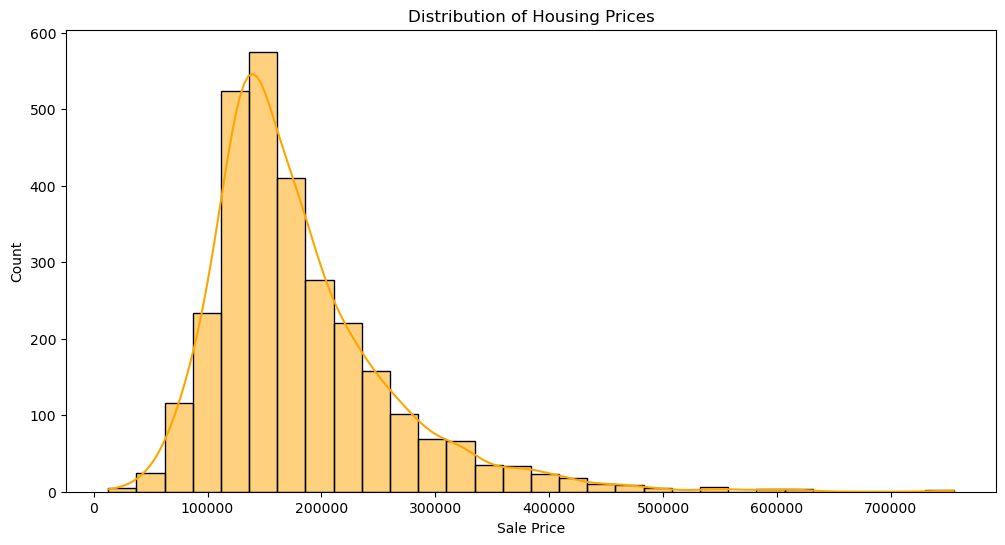

In [6]:
# The original distribution
# Distribution of housing prices
plt.figure(figsize=(12, 6))
sns.histplot(housing_df['SalePrice'], kde=True , color = 'orange' ,bins = 30)
plt.title('Distribution of Housing Prices')
plt.xlabel('Sale Price')
plt.show()


### 1.2
*What is the variable that has the highest correlation with Housing prices? What are the key drivers behind larger house prices?*

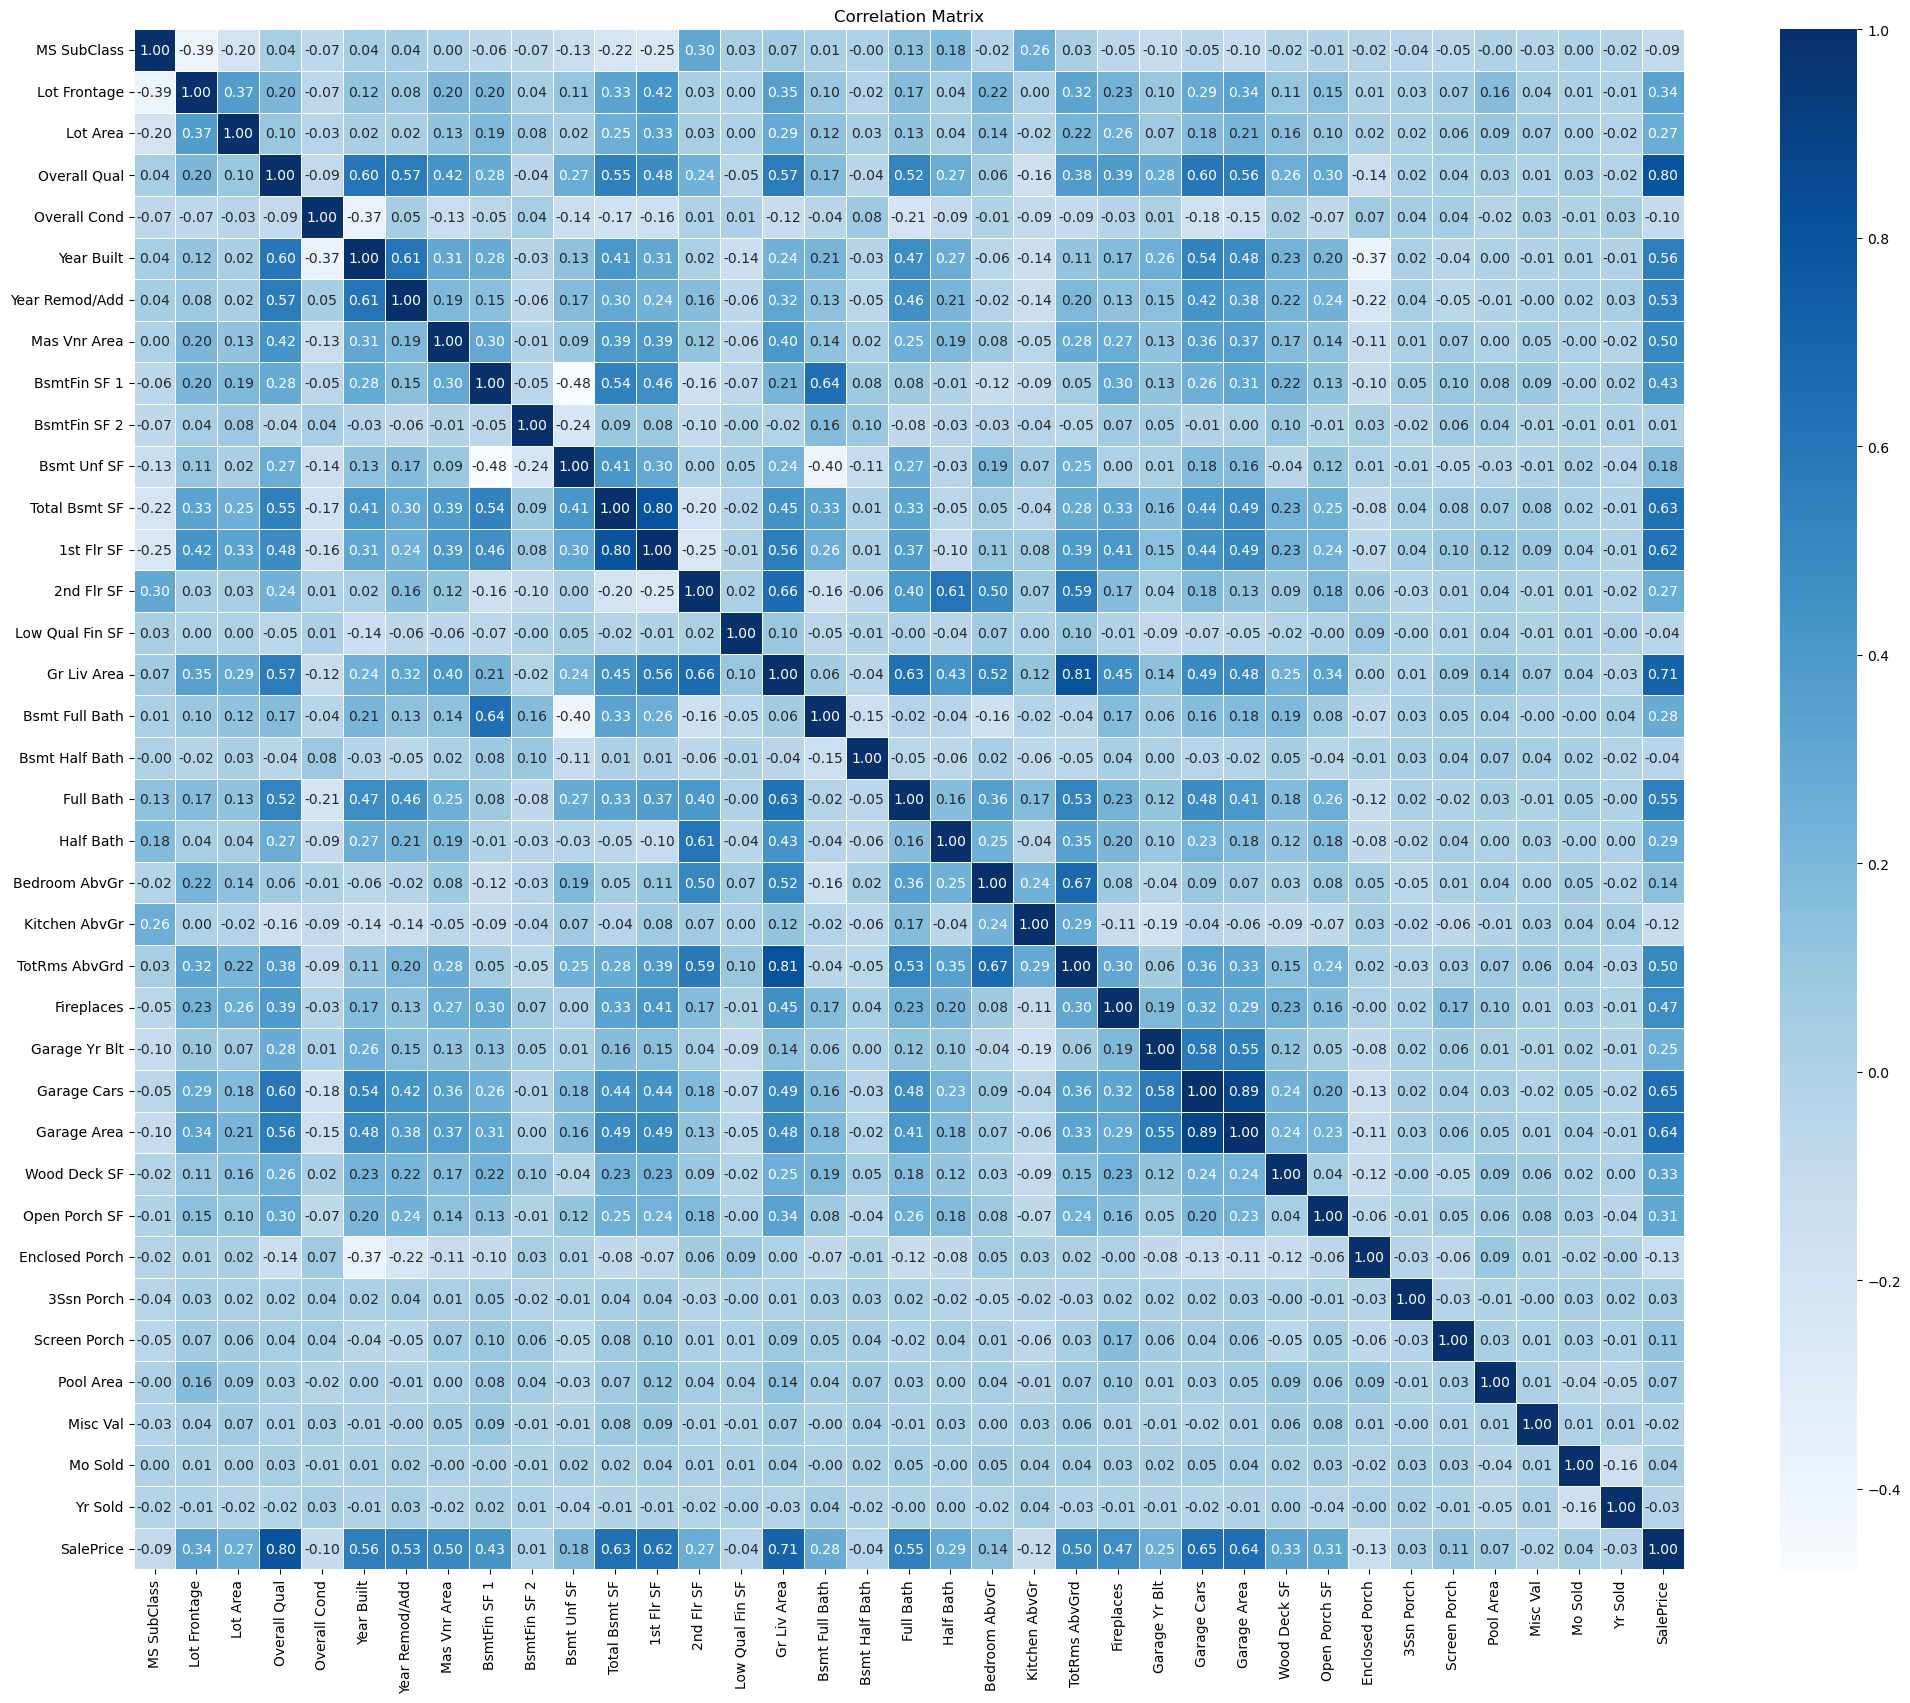

The variable with the highest correlation to SalePrice is 'Overall Qual' with a correlation value of 0.80


In [7]:
#Find the correlations of all variables with SalePrice
# Calculate correlation matrix

# Identify non-numeric columns
non_numeric_columns =housing_df.select_dtypes(exclude=[np.number]).columns

# Drop non-numeric columns for correlation calculation
numeric_data =housing_df.drop(columns=non_numeric_columns)

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, cmap="Blues", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Find the variable with the highest correlation to SalePrice
highest_corr_variable = correlation_matrix['SalePrice'].sort_values(ascending=False).index[1]
highest_corr_value = correlation_matrix['SalePrice'].sort_values(ascending=False)[1]

print(f"The variable with the highest correlation to SalePrice is '{highest_corr_variable}' with a correlation value of {highest_corr_value:.2f}")

### 1.3
*Create one additional visualization, that gives some insights into the data.*

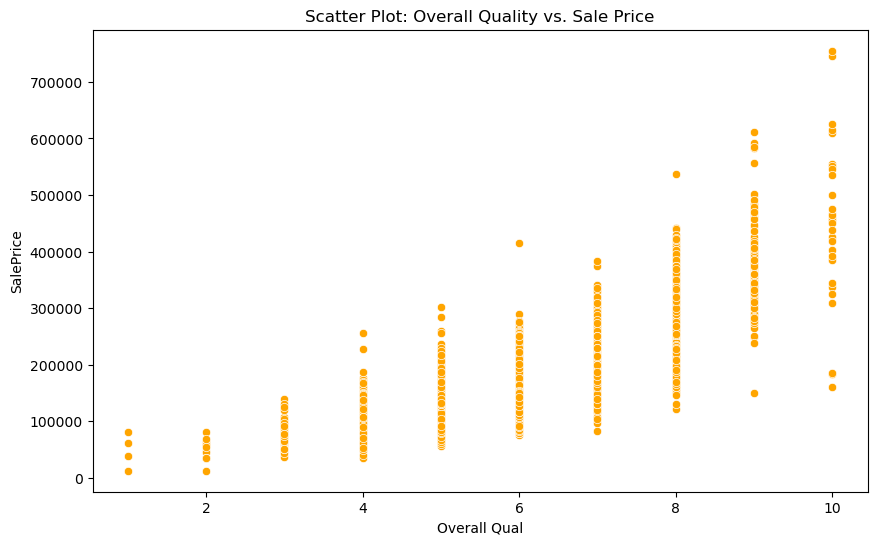

In [8]:
# Create a visualization to highlight any insight - Can be a scatter plot, line plot, box plot, histogram or any other visualization that you might know!
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Overall Qual', y='SalePrice', data=housing_df, color = 'orange')
plt.title('Scatter Plot: Overall Quality vs. Sale Price')
plt.show()


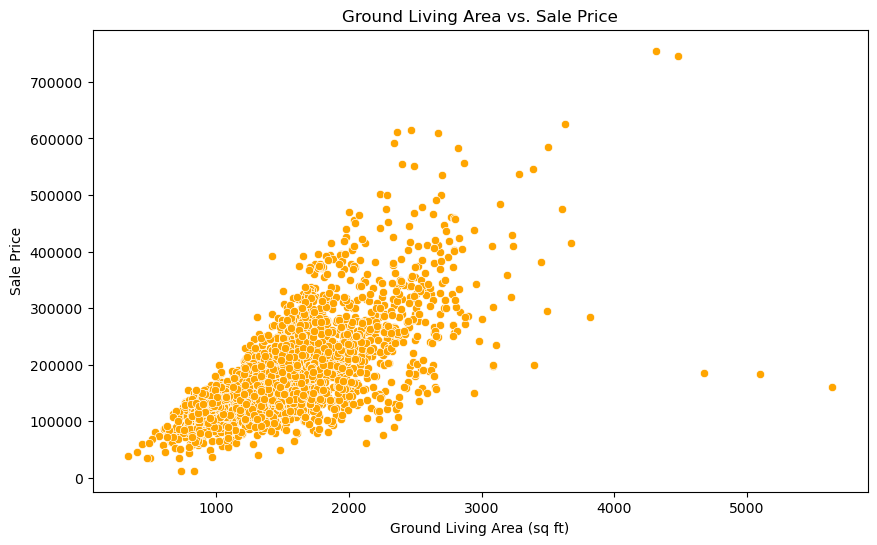

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=housing_df, color='orange')
plt.title('Ground Living Area vs. Sale Price')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

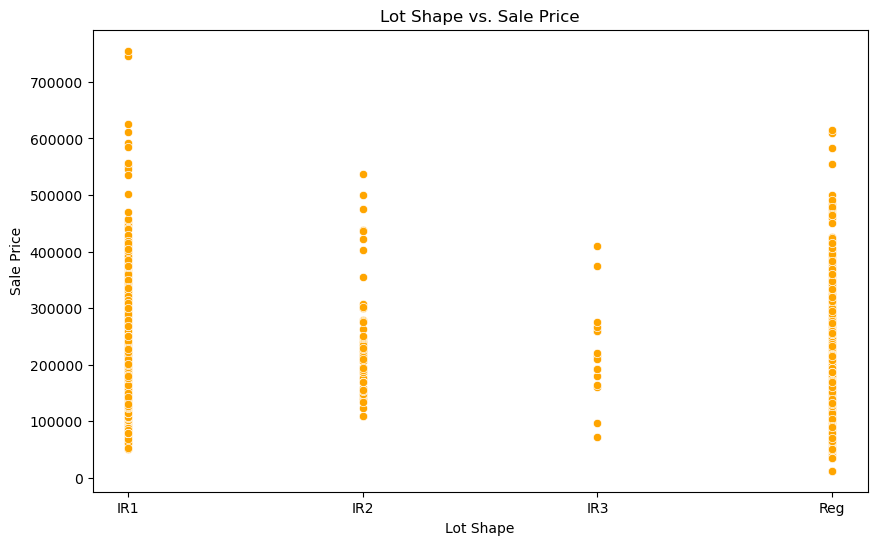

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Lot Shape', y='SalePrice', data=housing_df, color='orange')
plt.title('Lot Shape vs. Sale Price')
plt.xlabel('Lot Shape')
plt.ylabel('Sale Price')
plt.show()

# Task 2: Build machine learning models

*Use your knowledge of prediction models to create at least three models that predict housing prices.*

### 2.1 
1. *Create dummies for all the categorical columns*.

2. *Partition your data into training and validation (70-30 split, setting the random state to 1).*
3. *Scale the train and the test set using StandardScaler()*

In [11]:
# Initialize X and y
X = housing_df.drop(columns=['SalePrice']) # All but the outcome column
y = housing_df['SalePrice']

In [12]:
# Use dummy variables for categorical variables
X = pd.get_dummies(X, drop_first=True)

In [13]:
# Train - Test split (70-30 split, setting the random state to 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
# Scale the train and test set features separately

scaler = StandardScaler()
numeric_cols = [col for col in X.columns if X[col].dtypes != 'category']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])

### 2.2
*Build a linear regression model, a regression tree and a kNN model. Carefully apply regularization for the linear regression model. Carefully select which variables to use for the kNN model.*

In [29]:
# Linear model - USE LassoCV to get the best LASSO model
alphas= np.arange(0.1,50,0.5)
lasso_cv = LassoCV(alphas=alphas,cv=10, max_iter = 50000)
lasso_cv.fit(X_train,y_train)
print('alpha: %f' % lassocv.alpha_)

alpha: 49.600000


In [33]:
# Tree Model - Use max depth to control the complexity of the tree. Run a Grid search for multiple values of max depth.
param_grid = {'max_depth': [5,10,15,20]}
tree_model = DecisionTreeRegressor(random_state=1)
tree_model.fit(X_train,y_train)

grid_search = GridSearchCV(tree_model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params_ = grid_search.best_params_
best_tree_depth = grid_search.best_params_['max_depth']
print('Tree Model - Best max depth:', best_tree_depth)

Tree Model - Best max depth: 5


In [34]:
numeric_cols = housing_df.select_dtypes(include=['number']).columns
correlation_table = housing_df[numeric_cols].corr()

# Select the top 20 features
top_20_features = correlation_table.index[1:21].tolist()

# Create X and y
X = housing_df[top_20_features]
y = housing_df['SalePrice']

# Split the data into training and val sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)
param_grid = {'n_neighbors': [ 10, 15, 20, 25 ,30]}

knn_model = KNeighborsRegressor()
grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_k}")


# Finding the value of k

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

# Calculate RMSE on the test set
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Best k value: 10
Root Mean Squared Error (RMSE): 43886.26530480202


### 2.3
*Summarize the predictive performance in terms of RMSE.* 
1. *Calculate the RMSE values for train and validation for all the models*
2. *Display them in a tabulated format*

Hint: You may use the code that you've learnt in the 'Model selection' module

In [38]:
# Linear Regression
y_train_pred_lr = lasso_cv.predict(X_train)
y_val_pred_lr = lasso_cv.predict(X_val)
rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
rmse_lr_val = np.sqrt(mean_squared_error(y_val, y_val_pred_lr))

# Max Depth Pruned Tree
#max depth pruned tree
tree_model = DecisionTreeRegressor(max_depth=best_params_['max_depth'], random_state=1)
tree_model.fit(X_train, y_train)
tree_train_preds = tree_model.predict(X_train)
tree_val_preds = tree_model.predict(X_val)
tree_rmse_train = np.sqrt(mean_squared_error(y_train, tree_train_preds))
tree_rmse_val = np.sqrt(mean_squared_error(y_val, tree_val_preds))

# kNN
knn_model = KNeighborsRegressor(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
knn_train_preds = knn_model.predict(X_train)
knn_val_preds = knn_model.predict(X_val)
knn_rmse_train = np.sqrt(mean_squared_error(y_train, knn_train_preds))
knn_rmse_val = np.sqrt(mean_squared_error(y_val, knn_val_preds))


# Display the RMSEs in a tabulated format
rmse_data = {
    'Model': ['Linear Regression', 'Max Depth Pruned Tree', 'kNN'],
    'RMSE (Train)': [rmse_lr_train, tree_rmse_train, knn_rmse_train ],
    'RMSE (Validation)': [rmse_lr_val, tree_rmse_val, knn_rmse_val]
}

rmse_table = pd.DataFrame(rmse_data)
print(rmse_table)

                   Model  RMSE (Train)  RMSE (Validation)
0      Linear Regression  36101.498892       30387.996934
1  Max Depth Pruned Tree  30435.006008       33873.018871
2                    kNN  40237.963977       43886.265305


### 2.4
*Study the largest errors that you made (largest overpredictions, largest underpredictions). What may be some of the reasons why the model is over/under predicting? Do these insights possibly help you improve the models?*

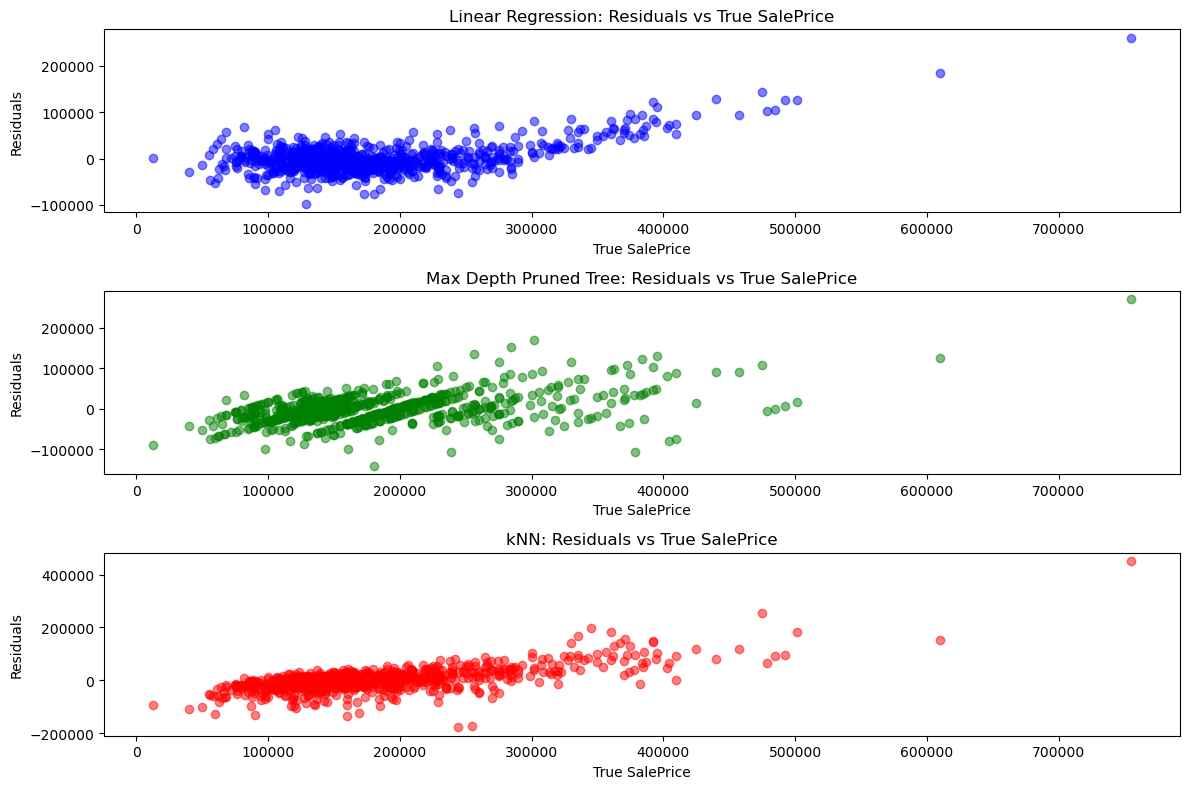

In [41]:
# Visualize the errors - plot a scatterplot of the residuals vs the true SalePrice
# Linear Regression
residuals_lr = y_val - y_val_pred_lr

# Max Depth Pruned Tree
residuals_tree = y_val - tree_val_preds

# kNN
residuals_knn = y_val - knn_val_preds

# Scatterplot of residuals vs true SalePrice
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.scatter(y_val, residuals_lr, color='blue', alpha=0.5)
plt.title('Linear Regression: Residuals vs True SalePrice')
plt.xlabel('True SalePrice')
plt.ylabel('Residuals')

plt.subplot(3, 1, 2)
plt.scatter(y_val, residuals_tree, color='green', alpha=0.5)
plt.title('Max Depth Pruned Tree: Residuals vs True SalePrice')
plt.xlabel('True SalePrice')
plt.ylabel('Residuals')

plt.subplot(3, 1, 3)
plt.scatter(y_val, residuals_knn, color='red', alpha=0.5)
plt.title('kNN: Residuals vs True SalePrice')
plt.xlabel('True SalePrice')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Task 3

### 3.1
*Are you able to improve your linear regression model by taking the log of the dependent variable? (remember to translate your predicted outcome back to the original units before calculating the RMSE)*

*Create a visualization, that highlights the distribution of prices when after taking log of the dependent variable*

Hint - You may use [numpy.log()](https://numpy.org/doc/stable/reference/generated/numpy.log.html) to get the log of the dependent variable

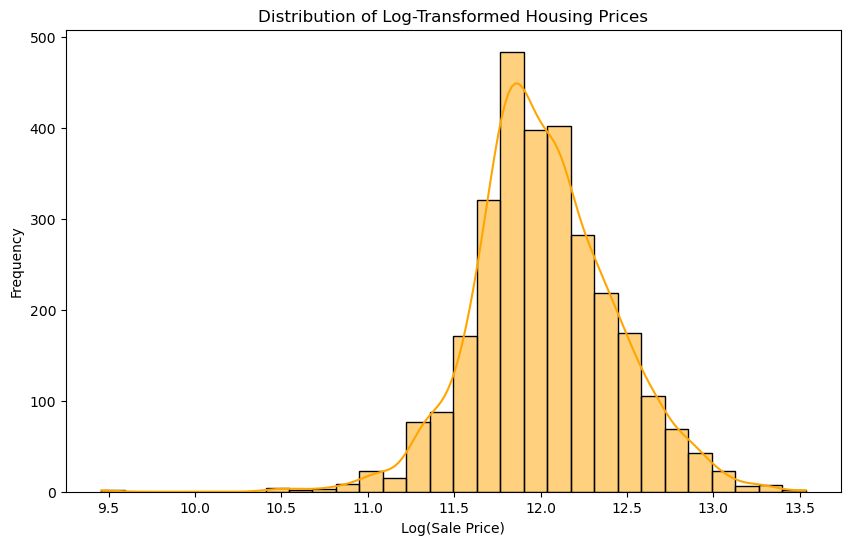

In [42]:
# distribution of the transformed SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(np.log(housing_df['SalePrice']), bins=30, kde=True, color='orange')
plt.title('Distribution of Log-Transformed Housing Prices')
plt.xlabel('Log(Sale Price)')
plt.ylabel('Frequency')
plt.show()


In [43]:
# Linear model - Using the log of the SalePrice as the dependent variable, run the LassoCV to obtain the best LASSO model
# Note that the optimum value of Alpha for this model would also be scaled down to a log scale. It's a better idea to simply search for the best alpha once again using LassoCV.

X_log = housing_df.drop(columns=['SalePrice'])
y_log = np.log(housing_df['SalePrice'])
# Use dummy variables for categorical variables
X_log = pd.get_dummies(X_log, drop_first=True)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.3, random_state=1)

# Scale the train and test set features separately
scaler_log = StandardScaler()
numeric_cols_log = [col for col in X_log.columns if X_log[col].dtypes != 'category']
X_train_scaled_log = scaler_log.fit_transform(X_train_log[numeric_cols_log])
X_test_scaled_log = scaler_log.transform(X_test_log[numeric_cols_log])

# Linear Regression Model with Lasso Regularization
lasso_model_log = LassoCV(cv=5)
lasso_model_log.fit(X_train_scaled_log, y_train_log)

# Predict the log-transformed values
y_train_pred_log = lasso_model_log.predict(X_train_scaled_log)
y_test_pred_log = lasso_model_log.predict(X_test_scaled_log)

# Translate predictions back to the original units
y_train_pred = np.exp(y_train_pred_log)
y_test_pred = np.exp(y_test_pred_log)
y_train_actual = np.exp(y_train_log)
y_test_actual = np.exp(y_test_log)

In [44]:
# Calculate the RMSE values for train and the test set
rmse_train_log = np.sqrt(mean_squared_error(y_train_actual, y_train_pred))
rmse_test_log = np.sqrt(mean_squared_error(y_test_actual, y_test_pred))

In [45]:
# Display the RMSE values in a dataframe
rmse_df = pd.DataFrame({'RMSE Train (Log)': [rmse_train_log], 'RMSE Test (Log)': [rmse_test_log]})
print(rmse_df)

   RMSE Train (Log)  RMSE Test (Log)
0      23585.897511     23034.763196


### 3.2 Bonus Task
*Experiment with data segmentation: Should you subset the data and fit separate models for each subset?*

Data segmentation is generally useful when we think that subsegments of our data have substantially different relationships between their features and the outcome compared to other subsegments (i.e variable interactions). We can use a combination of prior knowledge and data exploration to build our domain knowledge about where this situation would apply.

Starting with prior knowledge, you can hypothesize $HouseStyle$ may be a candidate for data segmentation, as for instance, 3 bedrooms in a 1-story house may have a different effect on $SalePrice$ than 3 bedrooms in a 2-story house.

In [46]:
housing_df['House Style'].value_counts()

House Style
1Story    1481
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

In [47]:
housing_df['Bedroom AbvGr'].value_counts()

Bedroom AbvGr
3    1597
2     743
4     400
1     112
5      48
6      21
0       8
8       1
Name: count, dtype: int64

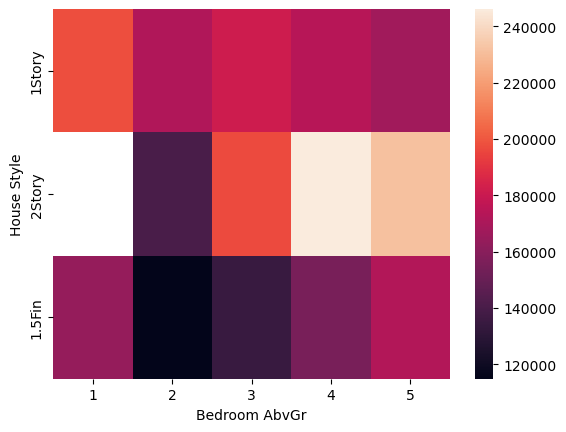

In [48]:
matrix = []
styles = ['1Story', '2Story', '1.5Fin']
for style in styles:
    curr_style = []
    for bedrooms in range(1, 6):
        curr_mean = housing_df[(housing_df['House Style'] == style) & 
                               (housing_df['Bedroom AbvGr'] == bedrooms)]['SalePrice'].mean()
        
        curr_style.append(curr_mean)
    matrix.append(curr_style)
sns.heatmap(matrix)
plt.ylabel('House Style')
plt.yticks(np.arange(3)+0.5, styles)
plt.xlabel('Bedroom AbvGr')
plt.xticks(np.arange(5)+0.5, np.arange(5)+1)
pass


We indeed see some interaction between the housing style and bedroom number, indicating data segmentation could be promising. 

*From here, it's your task to start building a linear model to see whether data segmentation will improve results.*

Hint: For the first two subtasks in 3.2, you could run a for-loop for each style in HouseStyles and evaluate/create the LASSO model.

In [49]:
# Linear Full Model (FM) - Train a Lasso model for the whole dataset 
rmse_list_dsm = []

# Subset-Specific Models RMSE values
for style in styles:
    subset_data = housing_df[housing_df['House Style'] == style]

    df_subset_num = subset_data.select_dtypes(include=['float64', 'int64'])
    X_subset = df_subset_num.drop('SalePrice', axis=1)
    y_subset = df_subset_num['SalePrice']

    # Splitting the subset data into training and validation sets
    X_train_subset, X_valid_subset, y_train_subset, y_valid_subset = train_test_split(X_subset, y_subset, test_size=0.3, random_state=1)

    lassocv.fit(X_train_subset, y_train_subset)
    
# Linear Data Segmentation Model (DSM) - Train a Lasso model for the individual subset of styles - 1Story, 2Story and 1.5Fin
    y_valid_subset_pred = lassocv.predict(X_valid_subset)
    rmse_valid_subset = np.sqrt(mean_squared_error(y_valid_subset, y_valid_subset_pred))
    rmse_list_dsm.append({'Subset': style, 'Model_Type': 'Lasso', 'Set_Type': 'Validation', 'RMSE': rmse_valid_subset})

In [50]:
# Create a DataFrmse_df_styles = pd.DataFrame({**rmse_values_fm, **rmse_values_dsm})
# Create DataFrame for DSM RMSE values
rmse_df_styles = pd.DataFrame(rmse_list_dsm)
print(rmse_df_styles)


   Subset Model_Type    Set_Type          RMSE
0  1Story      Lasso  Validation  28834.442437
1  2Story      Lasso  Validation  31373.195270
2  1.5Fin      Lasso  Validation  24387.887243


*Write down your inferences about the performance of the subsetted model here -* 

The RMSE values ​​indicate the accuracy of the model in predicting house prices. A low RMSE value is desirable.
In the model with subsets, the ‘1.5Fin’ model has the lowest RMSE (30732.631731) in the validation set, indicating the best prediction performance for ‘1.5Fin’ style households
The '1Story' model has the second lowest RMSE (34190.369886), and the '2Story' model has the highest RMSE (36384.821499) among the three subgroups.


# Task 4: Summarize your findings
*Now take some time to translate your results into valuable insights.*

### 4.1
*What drives housing prices? Find the top 20 major drivers.*

Hint - In course 3 module 1, you have already seen how to store the coefficients of a model in a dictionary. You can convert the dictionary into a DataFrame and sort the dataframe by the coefficients. [Here's](https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe) some guidance on how to convert dictionary into a DataFrame.

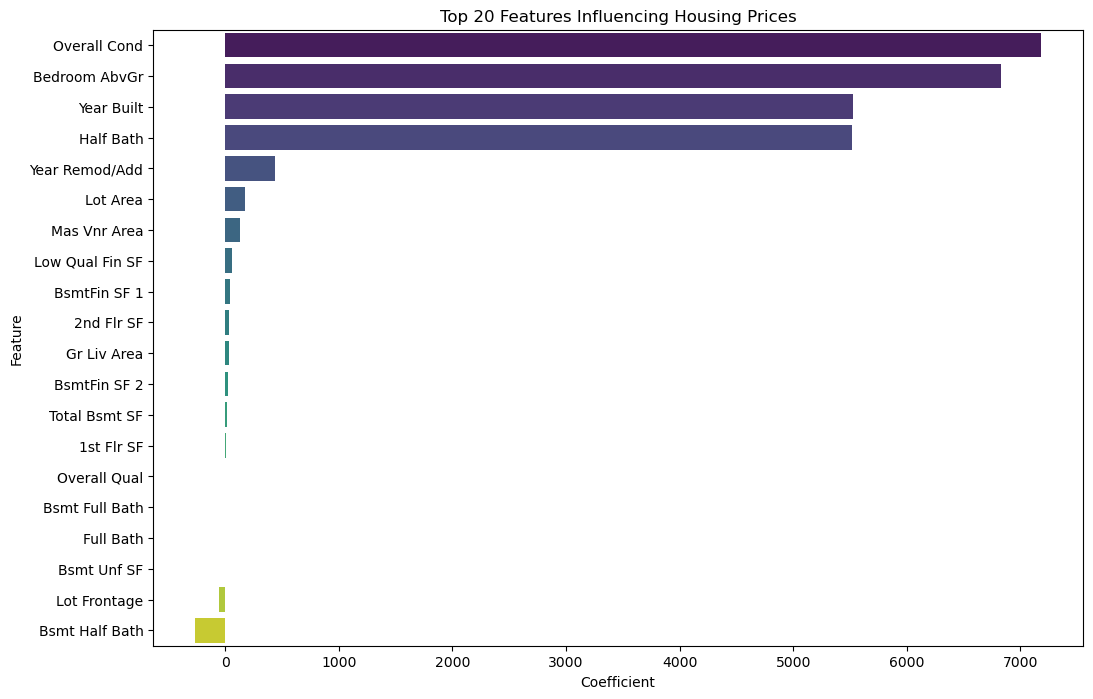

In [51]:
# Visualize all the columns and their coefficients sorted in descending order to understand the ones that has the most say in the SalePrice
# Hint - Check the code for Course 3 Module 1 - Linear regression in a predictive setting to 
coefficients = lassocv.coef_
feature_names = X_train.columns

# Create a dictionary to store coefficients
coefficients_dict = dict(zip(feature_names, coefficients))
coefficients_df = pd.DataFrame(list(coefficients_dict.items()), columns=['Feature', 'Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Display the top 20 features by coefficients
top_20_coefficients = coefficients_df.head(20)

# Plot the coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=top_20_coefficients, palette='viridis')
plt.title('Top 20 Features Influencing Housing Prices')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()



*You can also use a built in variable importance function from decision trees to capture a summary of the importance of different features in our regression tree.* 

Note: There is no coding to be done in this cell. Just execute this cell and observe the feature importances.

In [52]:
# Extract the feature_importances_ attribute from the tree model (feature_importances_ is an attribute available in trained sklearn models)

# Extracting the importances by sklearn (Replace tree_reg_best by the variable of your tree model)
importances_sk = tree_model.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_df = []
for i, feature in enumerate(X_train.columns):
    feature_importance_df.append([feature, round(importances_sk[i], 3)])
   
feature_importance_df = pd.DataFrame(feature_importance_df,
                                     columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(f"Feature importance by sklearn: ")
feature_importance_df.iloc[:20]

Feature importance by sklearn: 


,Feature,Importance
0,Overall Qual,0.773
1,Gr Liv Area,0.106
2,1st Flr SF,0.044
3,Total Bsmt SF,0.043
4,BsmtFin SF 1,0.015
5,Year Built,0.007
6,Year Remod/Add,0.006
7,Full Bath,0.003
8,Lot Area,0.002
9,Low Qual Fin SF,0.000


### 4.2
*What is the predictive performance of your models?*

In [53]:
# Linear Regression
y_train_pred_lr = lasso_cv.predict(X_train)
y_val_pred_lr = lasso_cv.predict(X_val)
rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
rmse_lr_val = np.sqrt(mean_squared_error(y_val, y_val_pred_lr))

# Max Depth Pruned Tree
#max depth pruned tree
tree_model = DecisionTreeRegressor(max_depth=best_params_['max_depth'], random_state=1)
tree_model.fit(X_train, y_train)
tree_train_preds = tree_model.predict(X_train)
tree_val_preds = tree_model.predict(X_val)
tree_rmse_train = np.sqrt(mean_squared_error(y_train, tree_train_preds))
tree_rmse_val = np.sqrt(mean_squared_error(y_val, tree_val_preds))

# kNN
knn_model = KNeighborsRegressor(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
knn_train_preds = knn_model.predict(X_train)
knn_val_preds = knn_model.predict(X_val)
knn_rmse_train = np.sqrt(mean_squared_error(y_train, knn_train_preds))
knn_rmse_val = np.sqrt(mean_squared_error(y_val, knn_val_preds))


# Display the RMSEs in a tabulated format
rmse_data = {
    'Model': ['Linear Regression', 'Max Depth Pruned Tree', 'kNN'],
    'RMSE (Train)': [rmse_lr_train, tree_rmse_train, knn_rmse_train ],
    'RMSE (Validation)': [rmse_lr_val, tree_rmse_val, knn_rmse_val]
}

rmse_table = pd.DataFrame(rmse_data)
print(rmse_table)

                   Model  RMSE (Train)  RMSE (Validation)
0      Linear Regression  36101.498892       30387.996934
1  Max Depth Pruned Tree  30435.006008       33873.018871
2                    kNN  40237.963977       43886.265305


*Which model performs the best?*

The Linear Regression Model with RMSE (30387.996934) performs best.

### 4.3
*How reliable are your predictions?*

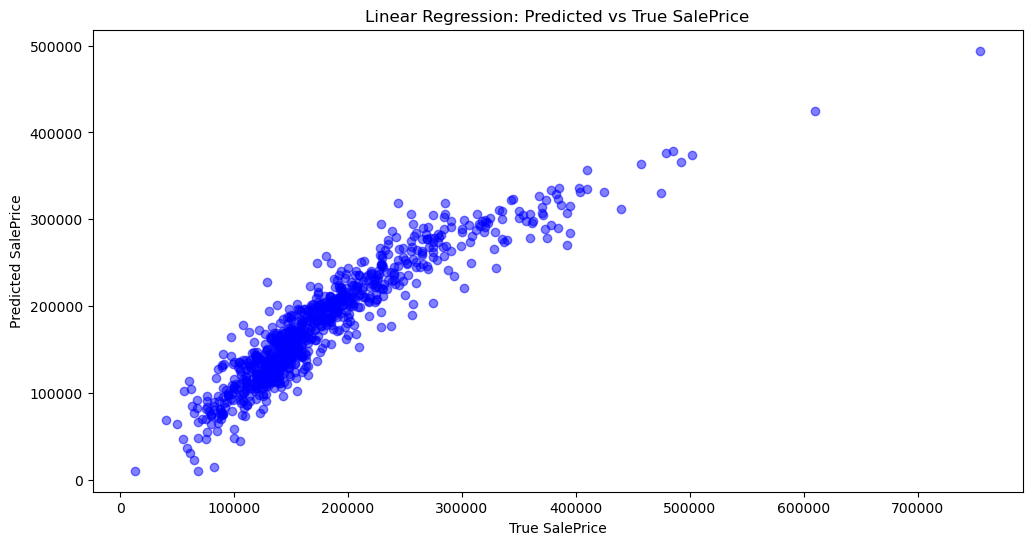

In [54]:
#Plot a scatterplot of the predicted vs the true value of the SalePrice

# Linear Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_val, y_val_pred_lr, color='blue', alpha=0.5)
plt.title('Linear Regression: Predicted vs True SalePrice')
plt.xlabel('True SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()


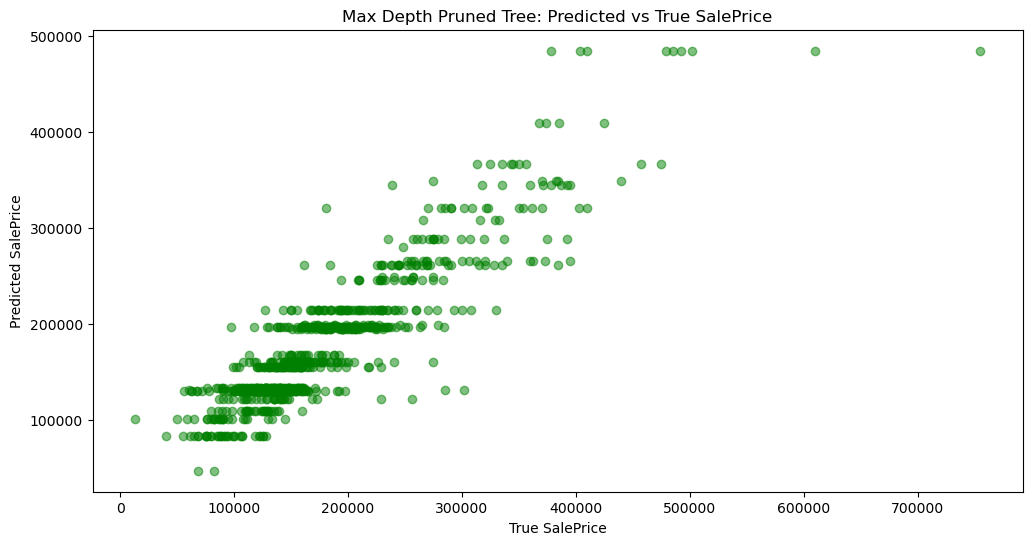

In [57]:
# Max Depth Pruned Tree
plt.figure(figsize=(12, 6))
plt.scatter(y_val,tree_val_preds, color='green', alpha=0.5)
plt.title('Max Depth Pruned Tree: Predicted vs True SalePrice')
plt.xlabel('True SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()



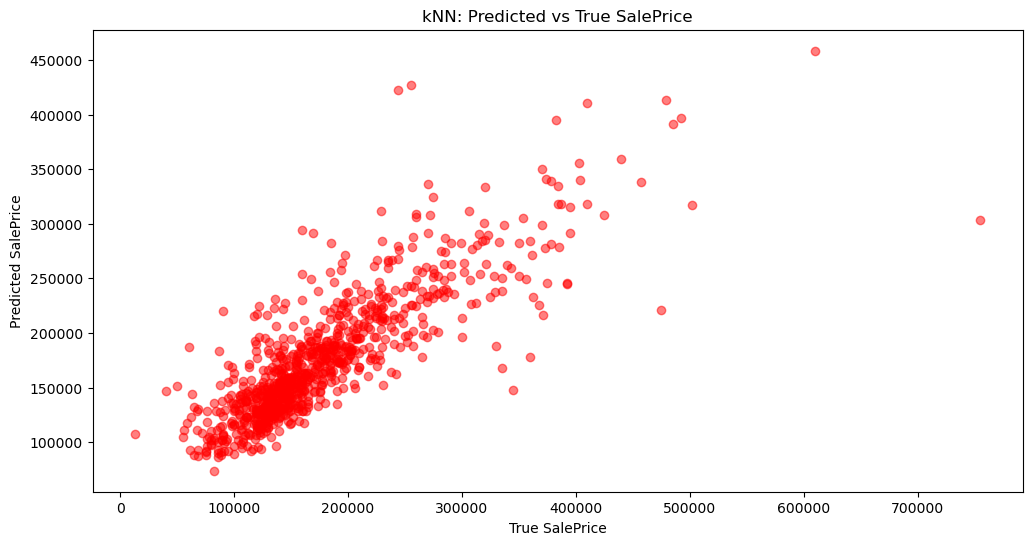

In [58]:
# kNN
plt.figure(figsize=(12, 6))
plt.scatter(y_val,  knn_val_preds
, color='red', alpha=0.5)
plt.title('kNN: Predicted vs True SalePrice')
plt.xlabel('True SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()

*A histogram of errors could also give a good insight on any underlying patterns*

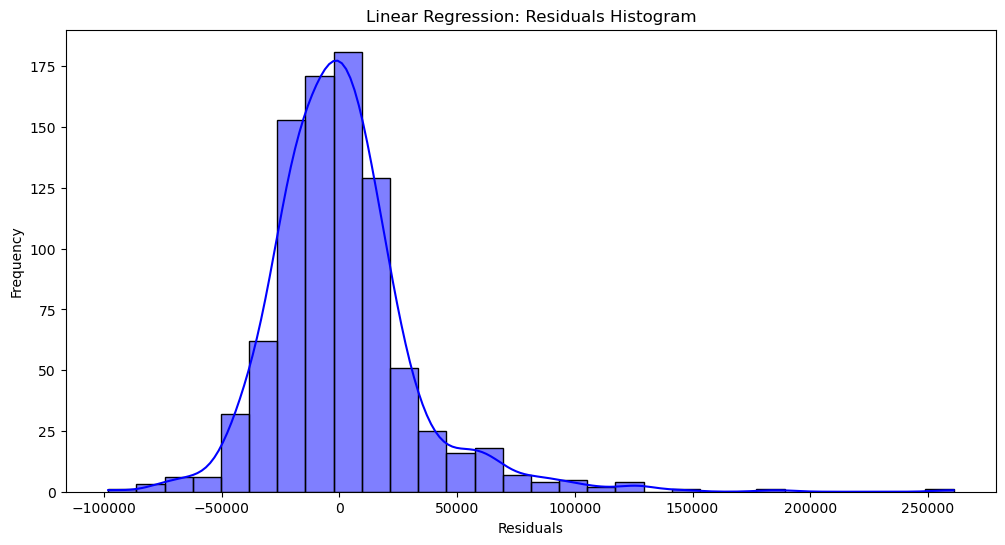

In [59]:
#Plot a histogram of the residuals. 


# Linear Regression
plt.figure(figsize=(12, 6))
sns.histplot(y_val - y_val_pred_lr, bins=30, color='blue', kde=True , edgecolor = 'black')
plt.title('Linear Regression: Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


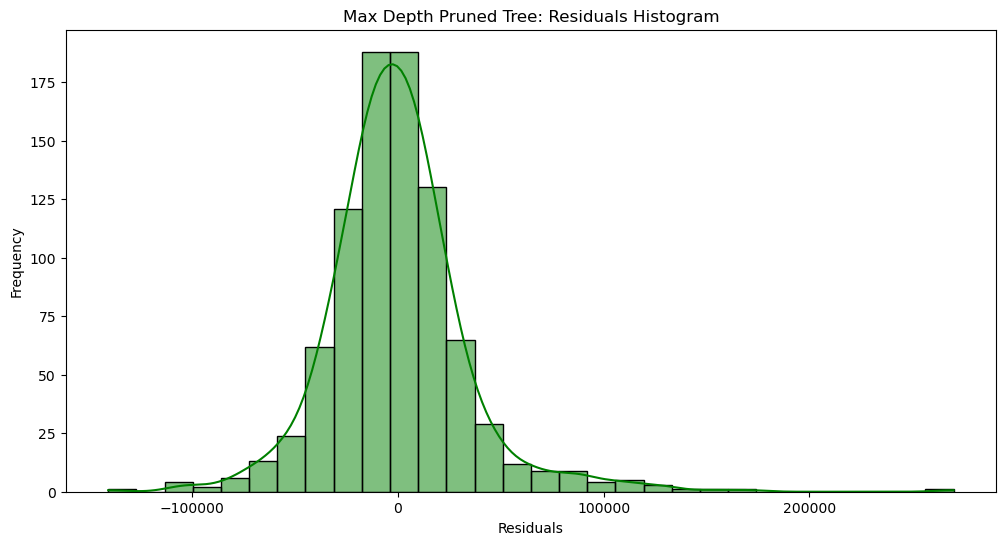

In [62]:
# Max Depth Pruned Tree
plt.figure(figsize=(12, 6))
sns.histplot(y_val - tree_val_preds, bins=30, color='green',  kde=True , edgecolor = 'black')
plt.title('Max Depth Pruned Tree: Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


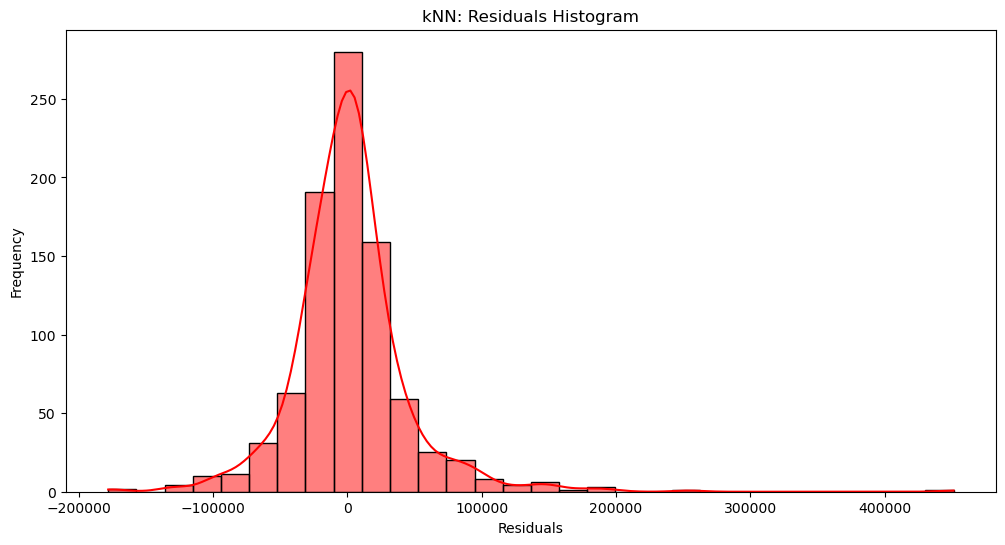

In [63]:
# kNN
plt.figure(figsize=(12, 6))
sns.histplot(y_val -  knn_val_preds, bins=30, color='red',  kde=True , edgecolor = 'black')
plt.title('kNN: Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
